<a href="https://colab.research.google.com/github/danielbauer1979/ML_656/blob/main/Module1_WageRegressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as st

In [4]:
wage_data = pd.read_csv('Wages_1985_Current_Population_Survey.csv')
wage_data.head() #syntax makes clear that data is an object!

,Yrs_Ed,Sthrn_Rgn,Sex,Yrs_Exprnc,Union,Wage,Age,Race,Occup,Sect,Marr
0,8,0,1,21,0,5.10,35,H,Other,Manf,1
1,9,0,1,42,0,4.95,57,W,Other,Manf,1
2,12,0,0,1,0,6.67,19,W,Other,Manf,0
3,12,0,0,4,0,4.00,22,W,Other,Other,0
4,12,0,0,17,0,7.50,35,W,Other,Other,1


In [33]:
wage_data.describe()

,Yrs_Ed,Sthrn_Rgn,Sex,Yrs_Exprnc,Union,Wage,Age,Marr
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,13.018727,0.292135,0.458801,17.822097,0.179775,9.024064,36.833333,0.655431
std,2.615373,0.455170,0.498767,12.379710,0.384360,5.139097,11.726573,0.475673
min,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,0.000000
25%,12.000000,0.000000,0.000000,8.000000,0.000000,5.250000,28.000000,0.000000
50%,12.000000,0.000000,0.000000,15.000000,0.000000,7.780000,35.000000,1.000000
75%,15.000000,1.000000,1.000000,26.000000,0.000000,11.250000,44.000000,1.000000
max,18.000000,1.000000,1.000000,55.000000,1.000000,44.500000,64.000000,1.000000


In [35]:
wage_data['Race'].value_counts()

W    440
O     67
H     27
Name: Race, dtype: int64

In [37]:
wage_data['Race_H'] = np.where(wage_data['Race'] == "H", 1, 0)
wage_data['Race_O'] = np.where(wage_data['Race'] == "O", 1, 0)
wage_data = wage_data.drop('Race', axis=1)
wage_data

,Yrs_Ed,Sthrn_Rgn,Sex,Yrs_Exprnc,Union,Wage,Age,Occup,Sect,Marr,Race_H,Race_O
0,8,0,1,21,0,5.10,35,Other,Manf,1,1,0
1,9,0,1,42,0,4.95,57,Other,Manf,1,0,0
2,12,0,0,1,0,6.67,19,Other,Manf,0,0,0
3,12,0,0,4,0,4.00,22,Other,Other,0,0,0
4,12,0,0,17,0,7.50,35,Other,Other,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
529,18,0,0,5,0,11.36,29,Prof,Other,0,0,0
530,12,0,1,33,0,6.10,51,Prof,Other,1,0,1
531,17,0,1,25,1,23.25,48,Prof,Other,1,0,1
532,12,1,0,13,1,19.88,31,Prof,Other,1,0,0


In [38]:
X1 = wage_data[['Sex','Age','Race_H','Race_O']]
y = wage_data['Wage']

In [41]:
model1 = LinearRegression(fit_intercept=True)
model1.fit(X1, y)
print(model1.intercept_)
print(model1.coef_)

7.223362465207445
[-2.29365014  0.08453479 -1.75369486 -1.3708409 ]


In [1]:
X2 = wage_data[['Sex','Age','Race_H','Race_O','Yrs_Ed','Sthren_Rgn']]

NameError: ignored

In [ ]:
second_reg = ols(formula="Wage ~ Sex + Age + Race + Yrs_Ed + Sthrn_Rgn", data=wage_data).fit()
print(second_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     31.20
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           4.07e-32
Time:                        21:12:24   Log-Likelihood:                -1550.2
No. Observations:                 534   AIC:                             3114.
Df Residuals:                     527   BIC:                             3144.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2365      1.450     -2.923      0.0

In [ ]:
second_reg.conf_int(alpha=0.05, cols=None)

,0,1
Intercept,-7.084025,-1.388967
Race[T.O],-2.629080,1.369725
Race[T.W],-1.527909,1.979231
Sex,-3.124739,-1.603921
Age,0.078417,0.144054
Yrs_Ed,0.648331,0.946791
Sthrn_Rgn,-1.673239,0.016383


In [ ]:
Occup_d = pd.get_dummies(wage_data['Occup'], prefix='Occup', drop_first=True)
Race_d = pd.get_dummies(wage_data['Race'], prefix='Race', drop_first=True)
Sect_d = pd.get_dummies(wage_data['Sect'], prefix='Sect', drop_first=True)
Occup_d.head(3)

,Occup_Mngmnt,Occup_Other,Occup_Prof,Occup_Sales,Occup_Service
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0


In [ ]:
X = wage_data.drop(columns=['Wage','Occup','Race','Sect'])
X = pd.concat([X,Occup_d,Race_d,Sect_d], axis=1)
X = sm.add_constant(X) # Add a constant term as the default model doesn't include one
y = wage_data['Wage']

In [ ]:
third_reg = sm.OLS(y, X).fit()
third_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     15.66
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           3.02e-35
Time:                        21:12:26   Log-Likelihood:                -1525.8
No. Observations:                 534   AIC:                             3086.
Df Residuals:                     517   BIC:                             3158.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2814      6.741     -0.042      0.967     -13.525      12.962
Yrs_Ed            0.8128      1.087      0.748      0.455      -1.322       2.948
Sthrn_Rgn        -0.5627      0.420     -1.340      0.181      -1.388       0.262
Sex              -1.9425      0.419     -4.631      0.000      -2.767      -1.119
Yrs_Exprnc        0.2448      1.082      0.226      0.821      -1.880       2.370
Union             1.6017      0.513      3.124      0.002       0.594       2.609
Age              -0.1580      1.081     -0.146      0.884      -2.282       1.965
Marr              0.3005      0.411      0.731      0.465      -0.507       1.108
Occup_Mngmnt      3.2682      0.763      4.286      0.000       1.770       4.766
Occup_Other      -0.0223      0.686     -0.033      0.974      -1.370       1.325
Occup_Prof        1.9346      0.670      2.886      0.004       0.617       3.252
Occup_Sales      -0.7956      0.838     -0.949      0.343      -2.442       0.851
Occup_Service    -0.7072      0.663     -1.066      0.287      -2.010       0.596
Race_O           -0.2314      0.992     -0.233      0.816      -2.179       1.717
Race_W            0.6065      0.870      0.697      0.486      -1.102       2.315
Sect_Manf         0.5635      0.992      0.568      0.570      -1.384       2.511
Sect_Other       -0.4774      0.966     -0.494      0.621      -2.375       1.421
==============================================================================
Omnibus:                      244.027   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2320.734
Skew:                           1.756   Prob(JB):                         0.00
Kurtosis:                      12.590   Cond. No.                     1.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

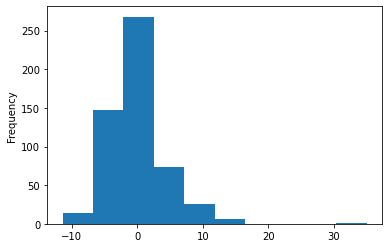

In [ ]:
ypred = third_reg.predict(X)
eps = y - ypred
eps.plot(kind='hist')

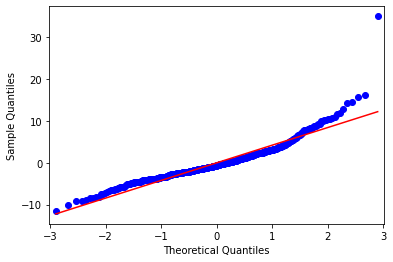

In [ ]:
fig = sm.qqplot(eps, line="s")
plt.show()

In [ ]:
fourth_reg = sm.OLS(np.log(y), X).fit()
fourth_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     18.31
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           5.65e-41
Time:                        21:12:27   Log-Likelihood:                -296.02
No. Observations:                 534   AIC:                             626.0
Df Residuals:                     517   BIC:                             698.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3940      0.674      2.069      0.039       0.070       2.718
Yrs_Ed            0.1253      0.109      1.153      0.250      -0.088       0.339
Sthrn_Rgn        -0.0929      0.042     -2.214      0.027      -0.175      -0.010
Sex              -0.2181      0.042     -5.202      0.000      -0.300      -0.136
Yrs_Exprnc        0.0680      0.108      0.629      0.530      -0.144       0.280
Union             0.2118      0.051      4.132      0.000       0.111       0.312
Age              -0.0586      0.108     -0.542      0.588      -0.271       0.154
Marr              0.0634      0.041      1.541      0.124      -0.017       0.144
Occup_Mngmnt      0.2096      0.076      2.750      0.006       0.060       0.359
Occup_Other      -0.0559      0.069     -0.815      0.415      -0.191       0.079
Occup_Prof        0.1569      0.067      2.340      0.020       0.025       0.289
Occup_Sales      -0.1548      0.084     -1.847      0.065      -0.319       0.010
Occup_Service    -0.1738      0.066     -2.622      0.009      -0.304      -0.044
Race_O            0.0335      0.099      0.338      0.736      -0.161       0.228
Race_W            0.1132      0.087      1.302      0.194      -0.058       0.284
Sect_Manf         0.0224      0.099      0.226      0.822      -0.172       0.217
Sect_Other       -0.0930      0.097     -0.962      0.336      -0.283       0.097
==============================================================================
Omnibus:                       29.215   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.026
Skew:                          -0.144   Prob(JB):                     2.09e-19
Kurtosis:                       4.945   Cond. No.                     1.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

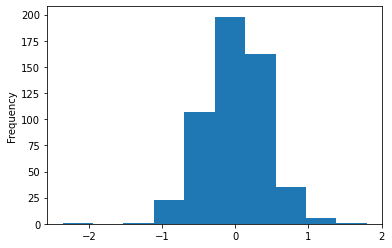

In [ ]:
ypred_2 = fourth_reg.predict(X)
eps_2 = np.log(y) - ypred_2
eps_2.plot(kind='hist')

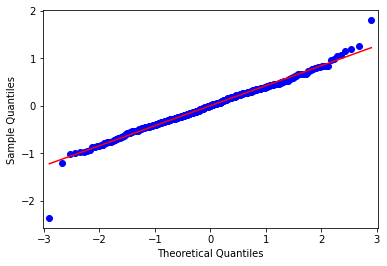

In [ ]:
fig = sm.qqplot(eps_2, line="s")
plt.show()